🔹 Original Data:
    Name   Age   Salary Department
0  Alice  25.0  50000.0         HR
1    Bob   NaN  60000.0         IT
2    NaN  30.0      NaN    Finance
3  David  22.0  45000.0        NaN
4    Eva   NaN  52000.0         IT


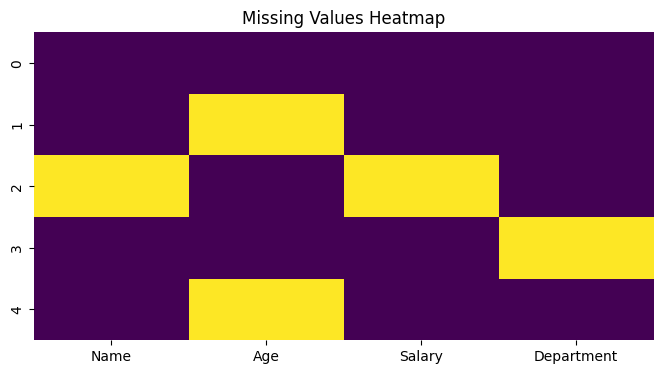


🔸 After Dropping Rows:
    Name   Age   Salary Department
0  Alice  25.0  50000.0         HR

🔸 After Filling (Mean/Mode):
    Name        Age   Salary Department
0  Alice  25.000000  50000.0         HR
1    Bob  25.666667  60000.0         IT
2  Alice  30.000000  51750.0    Finance
3  David  22.000000  45000.0         IT
4    Eva  25.666667  52000.0         IT

🔸 After Interpolation:
    Name   Age   Salary Department
0  Alice  25.0  50000.0         HR
1    Bob  27.5  60000.0         IT
2    NaN  30.0  52500.0    Finance
3  David  22.0  45000.0        NaN
4    Eva  22.0  52000.0         IT

✅ Saved cleaned data to 'Q11_cleaned_data.csv'.


In [8]:
# Ques_11.ipynb - Advanced Missing Data Handling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import concurrent.futures


# === Function 1: Load data with error handling ===
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        if df.empty:
            raise ValueError("Loaded DataFrame is empty.")
        return df
    except FileNotFoundError:
        print("❌ File not found. Please check the path.")
        return pd.DataFrame()
    except pd.errors.EmptyDataError:
        print("❌ File is empty.")
        return pd.DataFrame()
    except Exception as e:
        print(f"❌ Unexpected error: {e}")
        return pd.DataFrame()


# === Function 2: Visualize missing values ===
def visualize_missing(df):
    plt.figure(figsize=(8, 4))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values Heatmap")
    plt.show()


# === Function 3: Fill missing values ===
def fill_missing_values(df):
    df = df.copy()
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
    return df


# === Function 4: Drop rows with any missing values ===
def drop_missing_rows(df):
    return df.dropna()


# === Function 5: Interpolate numeric data ===
def interpolate_missing(df):
    df = df.copy()
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col] = df[col].interpolate()
    return df


# === Function 6: Chunked processing with memory efficiency ===
def process_in_chunks(file_path, chunk_size=1000, output_file="cleaned_output.csv"):
    try:
        first_chunk = True
        for chunk in pd.read_csv(file_path, chunksize=chunk_size):
            cleaned_chunk = fill_missing_values(chunk)
            mode = 'w' if first_chunk else 'a'
            header = first_chunk
            cleaned_chunk.to_csv(output_file, mode=mode, header=header, index=False)
            first_chunk = False
        print(f"✅ Cleaned chunks saved to '{output_file}'")
    except Exception as e:
        print(f"❌ Error during chunked processing: {e}")


# === Optional: Multithreaded chunk processing (Advanced) ===
def async_chunk_processing(file_path, chunk_size=1000):
    try:
        chunks = list(pd.read_csv(file_path, chunksize=chunk_size))

        def process_chunk(chunk):
            return fill_missing_values(chunk)

        with concurrent.futures.ThreadPoolExecutor() as executor:
            results = list(executor.map(process_chunk, chunks))

        return pd.concat(results, ignore_index=True)
    except Exception as e:
        print(f"❌ Async processing failed: {e}")
        return pd.DataFrame()


# === Function 7: Generate sample data (for demonstration) ===
def generate_sample_data():
    data = {
        'Name': ['Alice', 'Bob', np.nan, 'David', 'Eva'],
        'Age': [25, np.nan, 30, 22, np.nan],
        'Salary': [50000, 60000, np.nan, 45000, 52000],
        'Department': ['HR', 'IT', 'Finance', np.nan, 'IT']
    }
    return pd.DataFrame(data)


# === MAIN EXECUTION ===
if __name__ == "__main__":
    # Step 1: Generate or load real data
    df = generate_sample_data()
    # df = load_data("your_dataset.csv")  # Uncomment for real dataset

    print("🔹 Original Data:")
    print(df)

    # Step 2: Visualize missing values
    visualize_missing(df)

    # Step 3a: Drop rows with missing values
    df_dropped = drop_missing_rows(df)
    print("\n🔸 After Dropping Rows:")
    print(df_dropped)

    # Step 3b: Fill with mean/mode
    df_filled = fill_missing_values(df)
    print("\n🔸 After Filling (Mean/Mode):")
    print(df_filled)

    # Step 3c: Interpolation
    df_interpolated = interpolate_missing(df)
    print("\n🔸 After Interpolation:")
    print(df_interpolated)

    # Step 4: Save cleaned result
    df_filled.to_csv("Q11_cleaned_data.csv", index=False)
    print("\n✅ Saved cleaned data to 'Q11_cleaned_data.csv'.")

    # Step 5 (Optional): Chunked processing
    # process_in_chunks("your_large_file.csv", chunk_size=1000)

    # Step 6 (Optional): Asynchronous processing
    # df_async = async_chunk_processing("your_large_file.csv")
    # df_async.to_csv("async_cleaned.csv", index=False)
